In [43]:
import pandas as pd
data = pd.read_parquet("data.parquet")

In [ ]:

data_subset = data.head(1500)
data_subset.to_excel("data_subset_Haoran.xlsx")
random_preprocessed_data = data_subset.sample(n=10)
with pd.ExcelWriter("random_preprocessed_data_Haoran.xlsx", engine='xlsxwriter') as writer:
    # Write the DataFrame to the specified Excel file
    random_preprocessed_data.to_excel(writer, sheet_name='Sheet1', index=False)

    # Access the XlsxWriter workbook and worksheet objects
    workbook = writer.book
    worksheet = writer.sheets['Sheet1']

    # Define a format for text wrapping
    wrap_format = workbook.add_format({'text_wrap': True})

    # Set the column width and apply the wrap format to each column
    worksheet.set_column('A:A', 40, wrap_format)  # Adjust width and wrap for Column1
    worksheet.set_column('B:B', 40, wrap_format)  
    worksheet.set_column('C:C', 40, wrap_format)
print(random_preprocessed_data)

                                                 output  \
55    To solve this problem with the given time comp...   
567   Here's a Python implementation of the function...   
1347  Debugging a complex multi-threaded Python prog...   
927   To solve the problem, we can modify the provid...   
1485  Here is the corrected code:\n\n```python\ndef ...   
1313  Here is a program in Python that accomplishes ...   
815   Here's one possible implementation:\n\n```pyth...   
1018  Here's a code that calculates the sum of all e...   
221   Here is the updated code using a while loop an...   
1114  Here is a possible implementation of the funct...   

                                            instruction  \
55    Construct a function that takes in a list of i...   
567   Write a function that reverses a given string ...   
1347  Describe the necessary steps to debug a comple...   
927   How would you solve the following problem: Giv...   
1485  Design a function to validate a phone number.\...

Following Mark's suggestion, I utilized the train-00000-of-00002.parquet dataset and randomly selected 10 data points from the first 1500 to minimize data variability.

In [52]:
value_counts_system = data_subset['system'].value_counts()
num_unique_system = len(value_counts_system)

print(value_counts_system)
print(f'Number of unique system prompts: {num_unique_system}')

system
As a Python code composer, you craft elegant and concise scripts.                       230
You are a Python code generator, capable of creating scripts from specifications.       225
As a Python code translator, you convert algorithms and pseudocode into Python.         224
You are a Python code analyst, evaluating scripts for potential improvements.           219
You are a Python code architect, reviewing and designing scalable and efficient code    205
As a Python code analyst, you investigate and solve complex coding mysteries            200
As a python code expert, you are capable of creating scripts from specifications.       197
Name: count, dtype: int64
Number of unique system prompts: 7


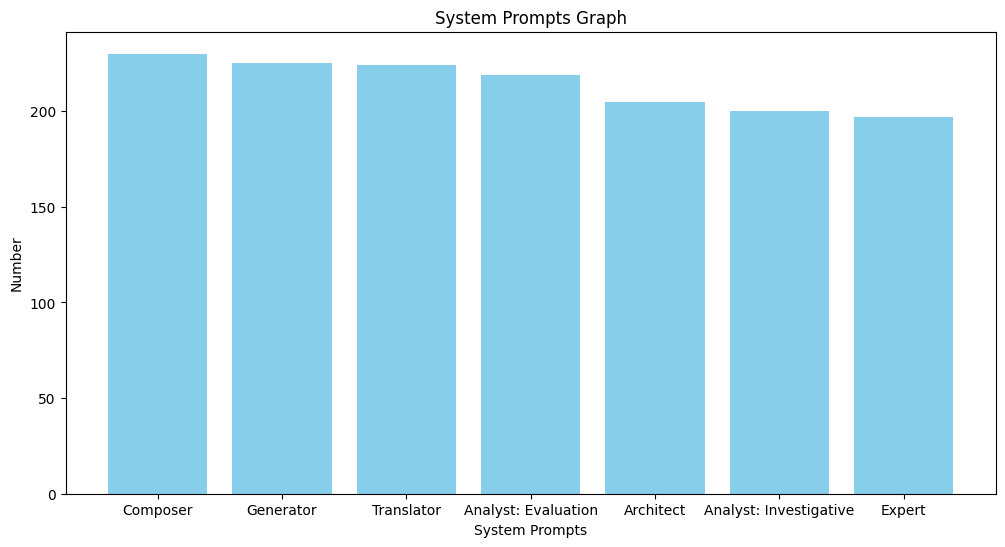

In [50]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Composer', 'Generator', 'Translator', 'Analyst: Evaluation', 'Architect', 'Analyst: Investigative', 'Expert']
values = [230, 225, 224, 219, 205, 200, 197]

plt.figure(figsize=(12, 6))
# Create the bar graph
plt.bar(categories, values, color='skyblue')

# Add titles and labels
plt.title('System Prompts Graph')
plt.xlabel('System Prompts')
plt.ylabel('Number')

# Show the plot
plt.show()

In line with Mark's analysis, this data subset includes approximately seven distinct coding roles. The roles, ranked from highest to lowest, are as follows: Composer, Generator, Translator, System Prompt Analyst, Architect, Investigative Analyst, and Expert.

system
As a python code expert, you are capable of creating scripts from specifications.    3
As a Python code translator, you convert algorithms and pseudocode into Python.      3
You are a Python code analyst, evaluating scripts for potential improvements.        2
As a Python code composer, you craft elegant and concise scripts.                    1
As a Python code analyst, you investigate and solve complex coding mysteries         1
Name: count, dtype: int64


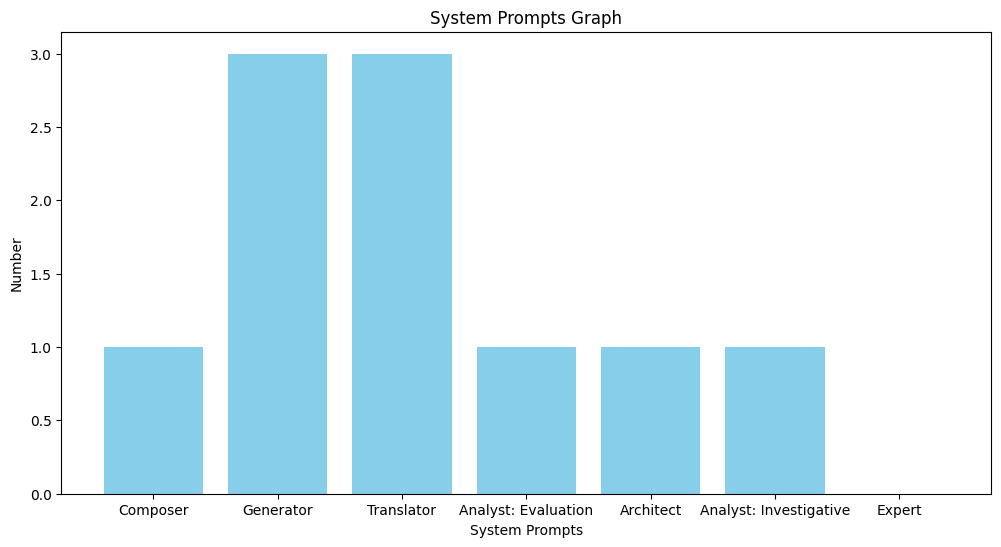

In [51]:
counts_system = random_preprocessed_data['system'].value_counts()

print(counts_system)

categories = ['Composer', 'Generator', 'Translator', 'Analyst: Evaluation', 'Architect', 'Analyst: Investigative', 'Expert']
values = [1, 3, 3, 1, 1, 1, 0]

plt.figure(figsize=(12, 6))
# Create the bar graph
plt.bar(categories, values, color='skyblue')

# Add titles and labels
plt.title('System Prompts Graph')
plt.xlabel('System Prompts')
plt.ylabel('Number')

# Show the plot
plt.show()

In the random sample of 10 data points, we observe the distribution of system prompt types, with generators and translators appearing slightly more than the other roles.

In [48]:
def average_word_length(series):
    # Split each string in the series into words
    words = series.str.split()
    
    # Calculate total number of words

    total_words = words.apply(len)
    
    # Calculate average number of words
    average_length = total_words.sum() / 10; #Ten rows of data
    return average_length

# Loop through each column and print the average word length for text columns
for column in random_preprocessed_data.select_dtypes(include=['object']).columns:  # Select only object type columns (text)
    avg_length = average_word_length(random_preprocessed_data[column])
    print(f'The average word length in column "{column}" is: {avg_length:.2f}')

The average word length in column "output" is: 213.30
The average word length in column "instruction" is: 166.70
The average word length in column "system" is: 12.00


Data Analysis: See random_preprocessed_data.xlsx

Inputs: On average, the word length of the instructions is 166.7 words. 
Most instructions (8 out of 10) explicitly request writing or modifying code (mention "function," "def," or "code").
Few instructions (3 out of 10) explicitly ask about debugging, fixing, or resolving errors.
A small portion (2 out of 10) explicitly involve problem-solving terminology.
2 out of 10 instructions specifically request validation or verification tasks.
Almost all instructions (9 out of 10) contain numeric elements, likely indicating specifics or constraints.
Most instructions (8 out of 10) have markdown formatting (e.g., bold, italics, bullet points, or inline code).

Output. On average, the word length of the outputs is 213.3 words.

The Outputs:
Almost all outputs have code and explanations about how said code works. All outputs contain numerical content, suggesting either code examples, numbered lists, or step-by-step explanations.



